In [2]:
import pandas as pd 
import numpy as np
from db_manager import Postgres

def load_data():
    db = Postgres()
    euribor = pd.read_sql(
        'SELECT eur_date, eur_12m FROM orchard.euribor', 
        db.conn
        )
    df_eur = euribor.set_index('eur_date')
    df_eur.index = pd.to_datetime(df_eur.index)
    return df_eur

In [28]:
df = load_data()
# 

### Basic Regression

https://otexts.com/fpp2/least-squares.html

https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0


In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model


In [48]:

def get_tendency(df, x, y, from_date='2021-03-01'):
    df_recent = df[from_date:]
    df_recent.reset_index(inplace=True)

    y = df_recent[y]
    X = pd.DatetimeIndex(df_recent[x]).to_julian_date()


    # Train and fit 
    regr = linear_model.LinearRegression()
    regr.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

    # Predcit 
    y_pred = regr.predict(X.values.reshape(-1, 1))

    # Plot results
    df_recent.plot.line(x='eur_date', y='eur_12m', title='Tendency of Euribor')
    plt.plot(df_recent['eur_date'], y_pred)
    
    return regr, y, X, y_pred 


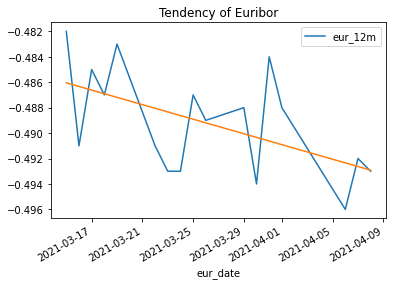

In [50]:
a = get_tendency(df, 'eur_date', 'eur_12m', '2021-03-15')